### **MLP con Early Stopping y Dropout (Core)**

Descripción:

En esta actividad, implementarás una red MLP más avanzada, utilizando técnicas como dropout y early stopping para evitar el sobreajuste. El dataset seleccionado es el «Heart Disease UCI» de Kaggle, donde se intentará predecir si un paciente tiene una enfermedad cardíaca o no basándose en varias características.

Enlace al dataset: https://www.kaggle.com/ronitf/heart-disease-uci



**Objetivo:**

El objetivo de esta actividad es entrenar una red MLP utilizando dropout para regularizar la red y early stopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deje de mejorar. Al final, se comparará el rendimiento de este modelo con el de un MLP básico.

# Descripción del Dataset: Heart Disease

Este dataset contiene información sobre pacientes con posibles enfermedades cardíacas. Es utilizado comúnmente para investigaciones y modelos de predicción en el ámbito médico. Contiene 920 registros con 16 variables relacionadas con características demográficas, clínicas y resultados de exámenes médicos.

## Estructura del Dataset

| **Variable** | **Tipo**       | **Descripción**                                                                                                   |
|--------------|----------------|-------------------------------------------------------------------------------------------------------------------|
| `id`         | `int64`        | Identificador único para cada entrada en el dataset.                                                             |
| `age`        | `int64`        | Edad del paciente en años.                                                                                       |
| `sex`        | `object`       | Sexo del paciente (`male` o `female`).                                                                           |
| `dataset`    | `object`       | Origen o tipo del dataset en el que se encuentra esta entrada (puede indicar de qué base proviene el registro).  |
| `cp`         | `object`       | Tipo de dolor torácico (`angina típica`, `angina atípica`, `dolor no anginoso`, etc.).                            |
| `trestbps`   | `float64`      | Presión arterial en reposo (mm Hg).                                                                              |
| `chol`       | `float64`      | Colesterol sérico en mg/dl.                                                                                       |
| `fbs`        | `object`       | Glucosa en ayuno > 120 mg/dl (`true` o `false`).                                                                 |
| `restecg`    | `object`       | Resultados del electrocardiograma en reposo (`normal`, `anomalía`, etc.).                                        |
| `thalch`     | `float64`      | Frecuencia cardíaca máxima alcanzada.                                                                            |
| `exang`      | `object`       | Angina inducida por ejercicio (`yes` o `no`).                                                                    |
| `oldpeak`    | `float64`      | Depresión del segmento ST inducida por el ejercicio en relación al reposo.                                       |
| `slope`      | `object`       | Pendiente del segmento ST durante el ejercicio (`ascendente`, `plano`, `descendente`).                          |
| `ca`         | `float64`      | Número de vasos principales coloreados por fluoroscopia (0-4).                                                   |
| `thal`       | `object`       | Tipo de defecto reversible (`normal`, `fijo`, `reversible`).                                                     |
| `num`        | `int64`        | Diagnóstico de enfermedad cardíaca (0 = ausencia, 1-4 = presencia, indicando severidad).                         |

## Notas importantes:
1. **Valores faltantes:** Varias columnas contienen valores nulos (`trestbps`, `chol`, `fbs`, `restecg`, `thalch`, `oldpeak`, `slope`, `ca`, `thal`). Se recomienda imputarlos o manejarlos adecuadamente antes del análisis.
2. **Variables categóricas:** Las variables como `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, y `thal` son categóricas y pueden necesitar codificación para modelos de machine learning.
3. **Variable objetivo:** La columna `num` indica la presencia y severidad de enfermedad cardíaca, siendo la variable objetivo para problemas de clasificación.
4. **Uso común:** Este dataset es ampliamente utilizado para predecir la presencia de enfermedades cardíacas y estudiar factores de riesgo.

## Ejemplo de análisis:

- Evaluar la correlación entre variables como `chol`, `age` y `num` para identificar patrones relacionados con enfermedades cardíacas.
- Realizar imputación de valores faltantes en las columnas `ca` y `thal` para maximizar la información disponible.



In [16]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils
from collections import Counter
from scipy.stats import chi2_contingency

In [3]:
path = '../data/heart_disease_uci.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [6]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
ca,309,611,66.41
thal,434,486,52.83
slope,611,309,33.59
fbs,830,90,9.78
oldpeak,858,62,6.74
trestbps,861,59,6.41
thalch,865,55,5.98
exang,865,55,5.98
chol,890,30,3.26
restecg,918,2,0.22


In [7]:
# Verificar si hay valores nulos en cada columna
nulos = df.isnull().sum()
print(nulos)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [5]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


**Detección y eliminación de valores duplicados** 

In [9]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


**Consistencia en valores categóricos**

In [10]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

""


### Conversion de variables 

In [12]:
import pandas as pd

# Identificar las columnas a convertir
columns_to_convert = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Convertir las columnas seleccionadas a tipo 'category'
df[columns_to_convert] = df[columns_to_convert].astype('category')

# Confirmar los cambios
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        920 non-null    int64   
 1   age       920 non-null    int64   
 2   sex       920 non-null    category
 3   dataset   920 non-null    category
 4   cp        920 non-null    category
 5   trestbps  861 non-null    float64 
 6   chol      890 non-null    float64 
 7   fbs       830 non-null    category
 8   restecg   918 non-null    category
 9   thalch    865 non-null    float64 
 10  exang     865 non-null    category
 11  oldpeak   858 non-null    float64 
 12  slope     611 non-null    category
 13  ca        309 non-null    float64 
 14  thal      434 non-null    category
 15  num       920 non-null    int64   
dtypes: category(8), float64(5), int64(3)
memory usage: 65.9 KB
None


In [13]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3
sex,Male,Female,None,None
dataset,Cleveland,Hungary,Switzerland,VA Long Beach
cp,typical angina,asymptomatic,non-anginal,atypical angina
fbs,True,False,NaN,None
restecg,lv hypertrophy,normal,st-t abnormality,NaN
exang,False,True,NaN,None
slope,downsloping,flat,upsloping,NaN
thal,fixed defect,normal,reversable defect,NaN


**Manejo de valores faltantes:**

In [17]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
ca,309,611,66.41
thal,434,486,52.83
slope,611,309,33.59
fbs,830,90,9.78
oldpeak,858,62,6.74
trestbps,861,59,6.41
thalch,865,55,5.98
exang,865,55,5.98
chol,890,30,3.26
restecg,918,2,0.22


In [18]:
#Lista de columnas categóricas a revisar
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = '../data/valores_unicos_iniciales.json'
# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")


Valores únicos en la columna 'sex':
['Male', 'Female']

Valores únicos en la columna 'dataset':
['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach']

Valores únicos en la columna 'cp':
['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina']

Valores únicos en la columna 'fbs':
[True, False]

Valores únicos en la columna 'restecg':
['lv hypertrophy', 'normal', 'st-t abnormality']

Valores únicos en la columna 'exang':
[False, True]

Valores únicos en la columna 'slope':
['downsloping', 'flat', 'upsloping']

Valores únicos en la columna 'thal':
['fixed defect', 'normal', 'reversable defect']

Valores únicos guardados en '../data/valores_unicos_iniciales.json'


In [19]:
def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra,
       pero mantiene los caracteres internos.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena


# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())



Valores únicos después de limpieza en 'sex':
['male', 'female']
Categories (2, object): ['female', 'male']

Valores únicos después de limpieza en 'dataset':
['cleveland', 'hungary', 'switzerland', 'va long beach']
Categories (4, object): ['cleveland', 'hungary', 'switzerland', 'va long beach']

Valores únicos después de limpieza en 'cp':
['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina']
Categories (4, object): ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina']

Valores únicos después de limpieza en 'fbs':
[True, False, NaN]
Categories (2, bool): [False, True]

Valores únicos después de limpieza en 'restecg':
['lv hypertrophy', 'normal', 'st-t abnormality', NaN]
Categories (3, object): ['lv hypertrophy', 'normal', 'st-t abnormality']

Valores únicos después de limpieza en 'exang':
[False, True, NaN]
Categories (2, bool): [False, True]

Valores únicos después de limpieza en 'slope':
['downsloping', 'flat', 'upsloping', NaN]
Categories (3, object): ['

In [20]:
# Guardar los valores únicos en un archivo JSON para referencia
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
# Guardar en 'valores_unicos.json'
with open('../data/valores_unicos_finales.json', 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print("Valores únicos guardados en 'valores_unicos.json'.")

Valores únicos guardados en 'valores_unicos.json'.


**Manejo de valores faltantes adecuadamente:**
* Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [21]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
ca,309,611,66.41
thal,434,486,52.83
slope,611,309,33.59
fbs,830,90,9.78
oldpeak,858,62,6.74
trestbps,861,59,6.41
thalch,865,55,5.98
exang,865,55,5.98
chol,890,30,3.26
restecg,918,2,0.22


### Explora las características que están relacionadas con la edad, el sexo, la presión arterial y otras variables clínicas.

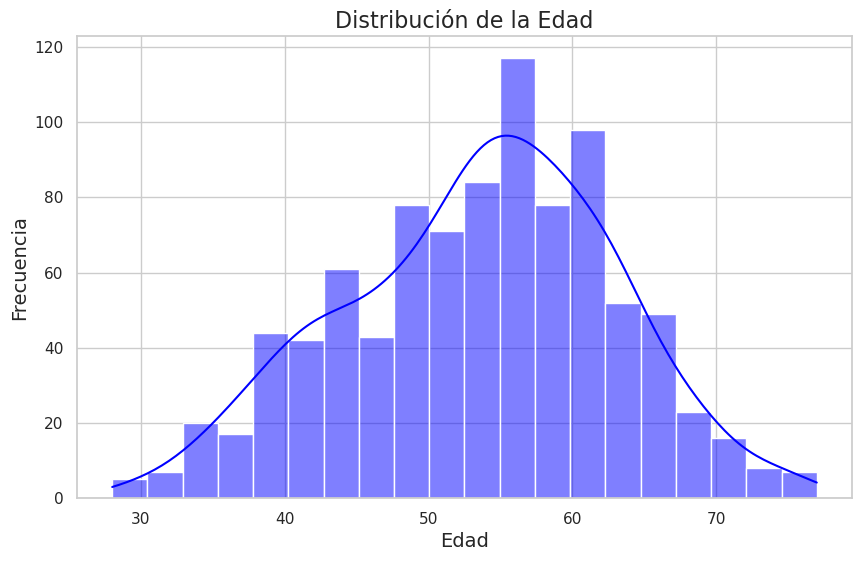

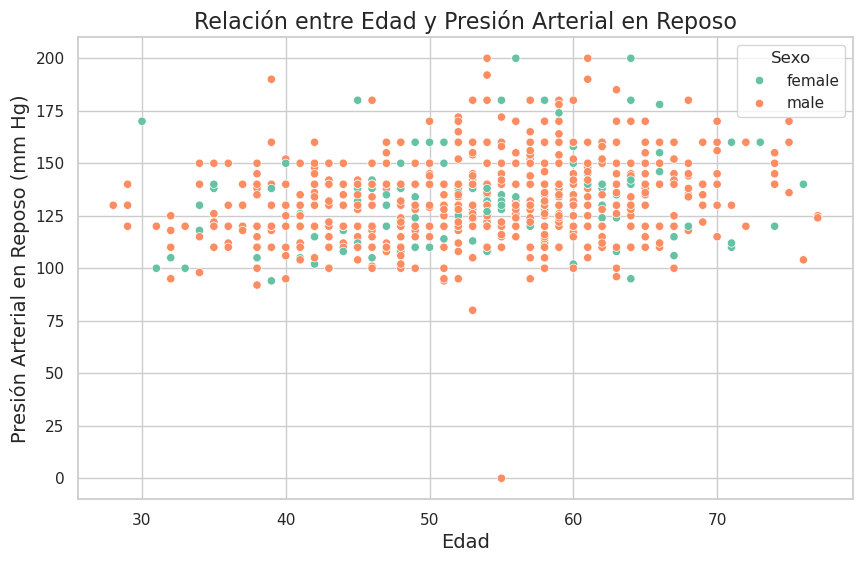

/tmp/ipykernel_2366/2003428309.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='trestbps', palette='muted')


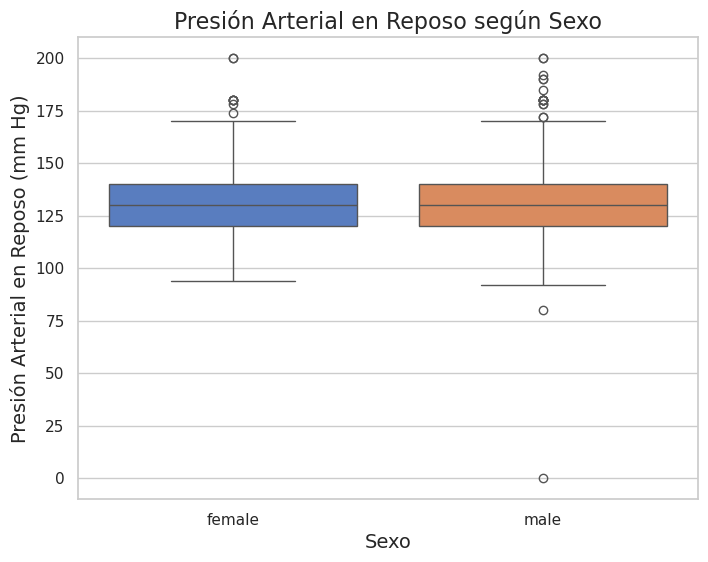

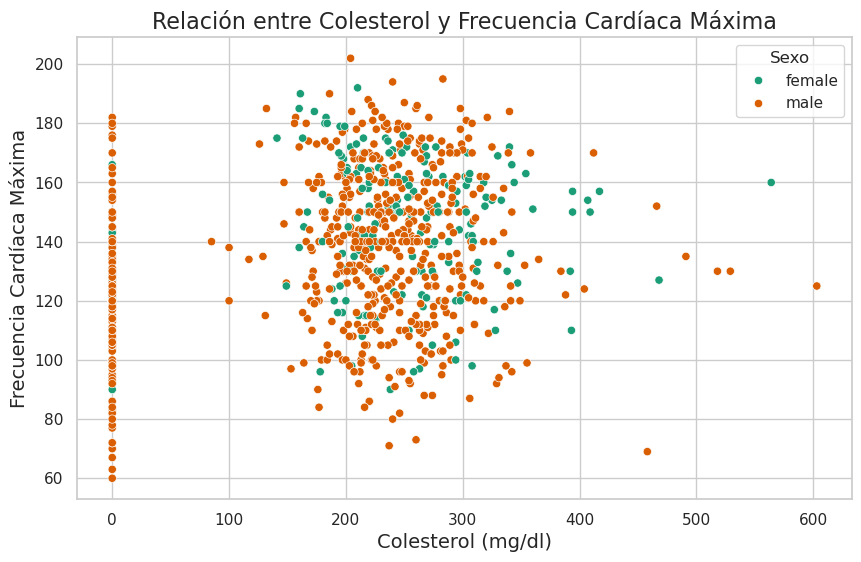

/tmp/ipykernel_2366/2003428309.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='exang', y='thalch', palette='coolwarm')


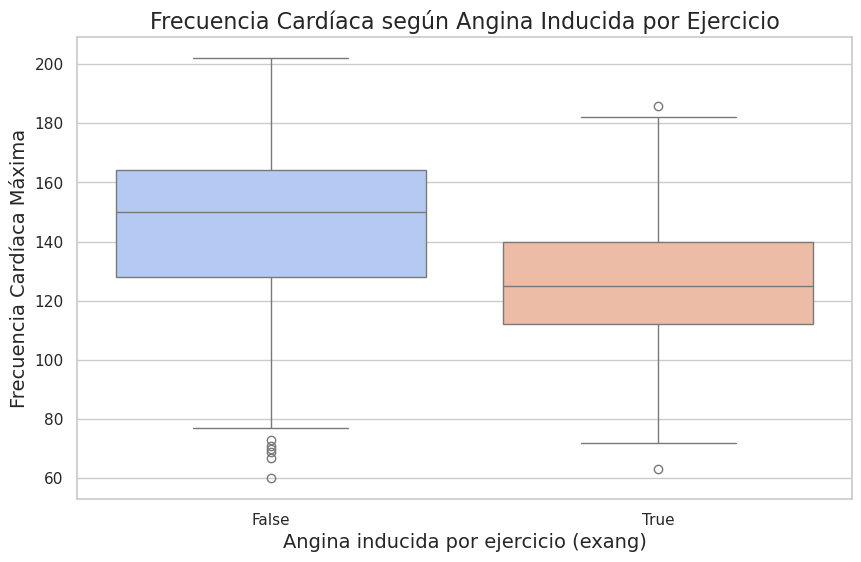

/tmp/ipykernel_2366/2003428309.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cp', y='oldpeak', palette='viridis')


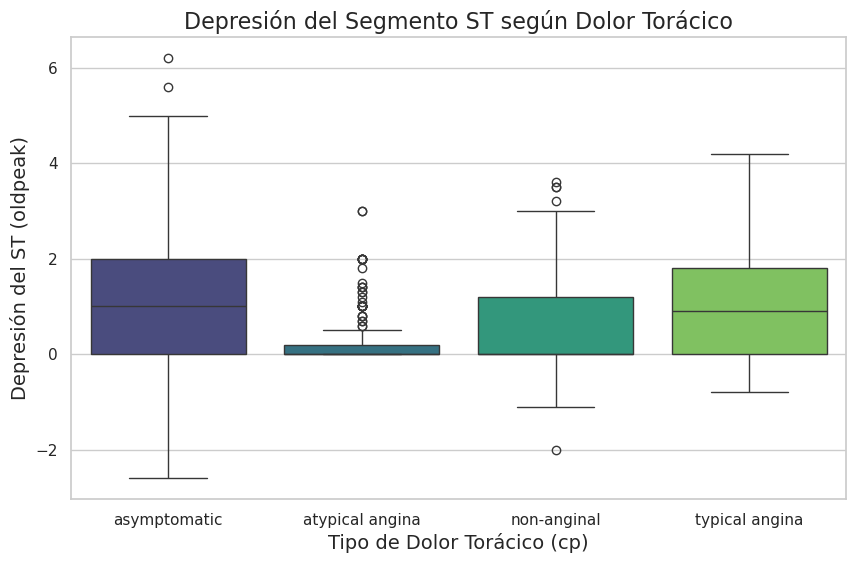

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cambiar estilo de gráficos
sns.set(style="whitegrid")

# 1. Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='blue')
plt.title('Distribución de la Edad', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

# 2. Relación entre edad y presión arterial en reposo (trestbps)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='trestbps', hue='sex', palette='Set2')
plt.title('Relación entre Edad y Presión Arterial en Reposo', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Presión Arterial en Reposo (mm Hg)', fontsize=14)
plt.legend(title='Sexo')
plt.show()

# 3. Comparación de presión arterial según el sexo
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='trestbps', palette='muted')
plt.title('Presión Arterial en Reposo según Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Presión Arterial en Reposo (mm Hg)', fontsize=14)
plt.show()

# 4. Relación entre colesterol (chol) y frecuencia cardíaca máxima (thalch)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='chol', y='thalch', hue='sex', palette='Dark2')
plt.title('Relación entre Colesterol y Frecuencia Cardíaca Máxima', fontsize=16)
plt.xlabel('Colesterol (mg/dl)', fontsize=14)
plt.ylabel('Frecuencia Cardíaca Máxima', fontsize=14)
plt.legend(title='Sexo')
plt.show()

# 5. Relación entre frecuencia cardíaca y angina inducida por ejercicio
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='exang', y='thalch', palette='coolwarm')
plt.title('Frecuencia Cardíaca según Angina Inducida por Ejercicio', fontsize=16)
plt.xlabel('Angina inducida por ejercicio (exang)', fontsize=14)
plt.ylabel('Frecuencia Cardíaca Máxima', fontsize=14)
plt.show()

# 6. Análisis de la depresión del segmento ST (oldpeak) por tipo de dolor torácico (cp)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cp', y='oldpeak', palette='viridis')
plt.title('Depresión del Segmento ST según Dolor Torácico', fontsize=16)
plt.xlabel('Tipo de Dolor Torácico (cp)', fontsize=14)
plt.ylabel('Depresión del ST (oldpeak)', fontsize=14)
plt.show()


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        920 non-null    float64
 14  thal      920 non-null    int64  
 15  num       920 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 115.1 KB


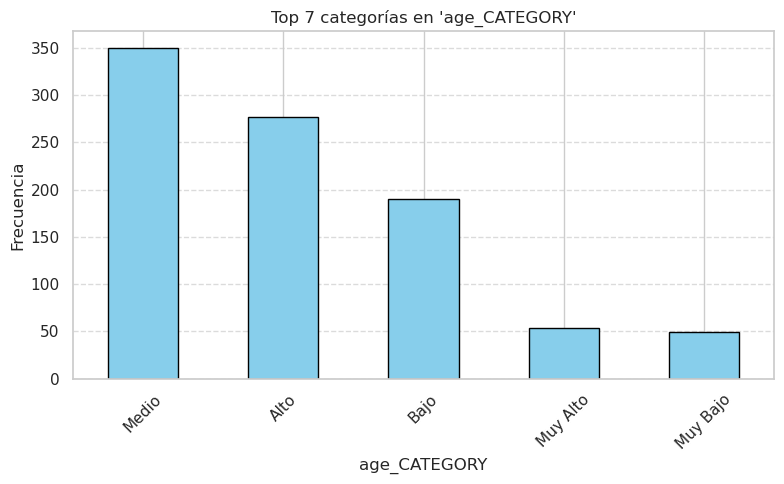

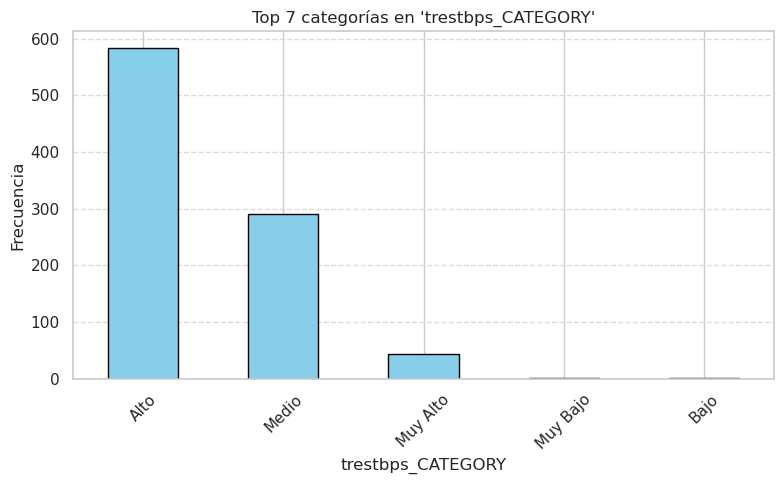

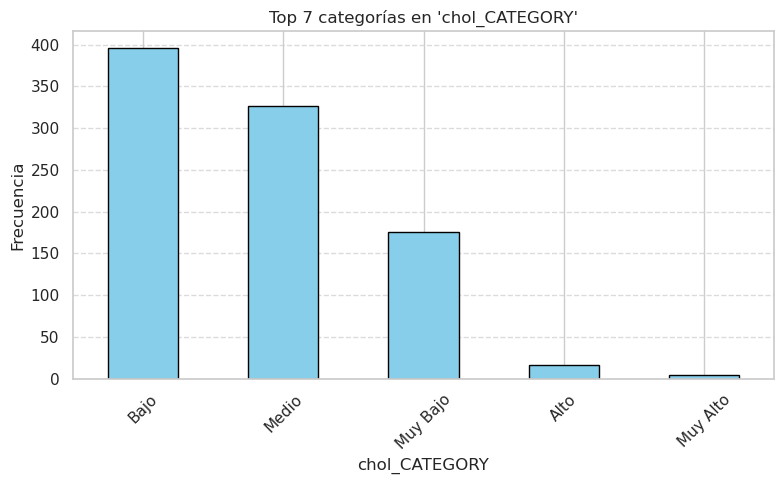

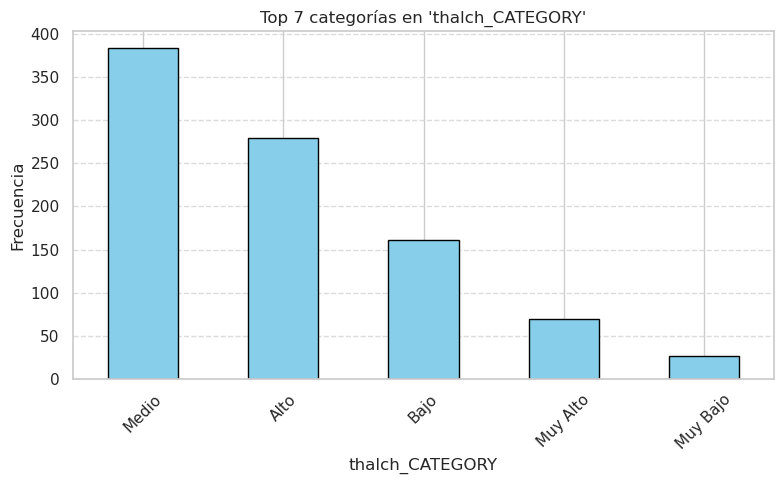

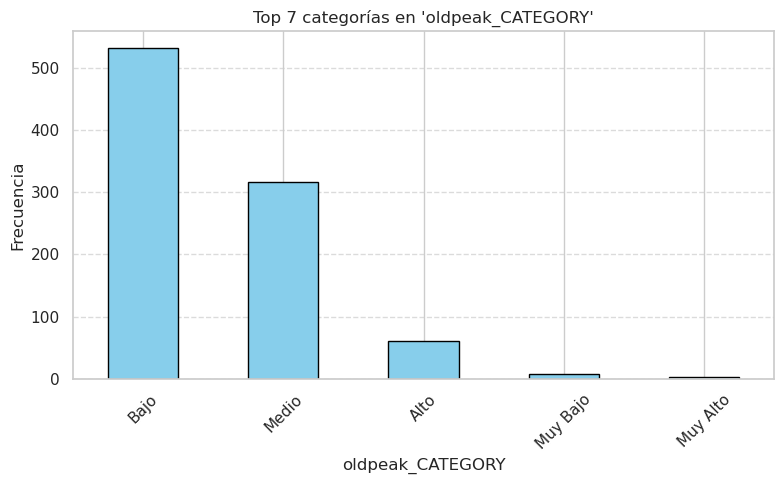

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Categorizar algunas columnas numéricas
columns_to_categorize = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']  # Lista de columnas a categorizar

# Crear categorías para cada una de las columnas seleccionadas
for column in columns_to_categorize:
    # Definir las categorías y el número de bins
    categories = pd.cut(df[column], bins=5, labels=["Muy Bajo", "Bajo", "Medio", "Alto", "Muy Alto"])
    df[column + '_CATEGORY'] = categories.astype("category")

# Ahora puedes graficar las categorías que creaste
categorical_columns = df.select_dtypes(include=["category"]).columns

# Iterar sobre las columnas categóricas
for column in categorical_columns:
    top_categories = df[column].value_counts().nlargest(7)  # Muestra las 7 categorías más frecuentes
    
    # Crear el gráfico de barras
    plt.figure(figsize=(8, 5))
    top_categories.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Top 7 categorías en '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


### Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

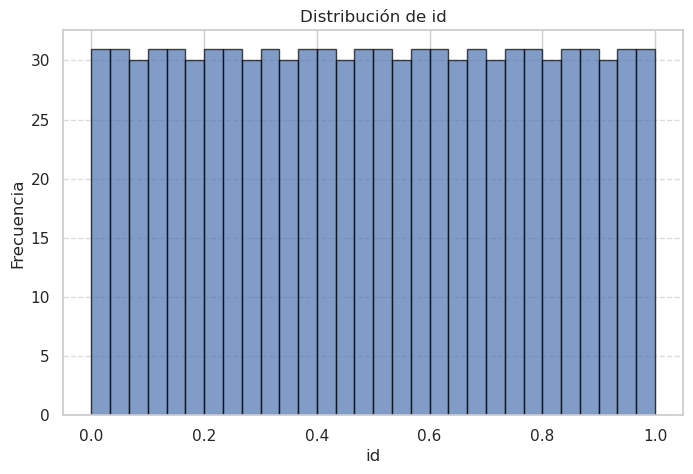

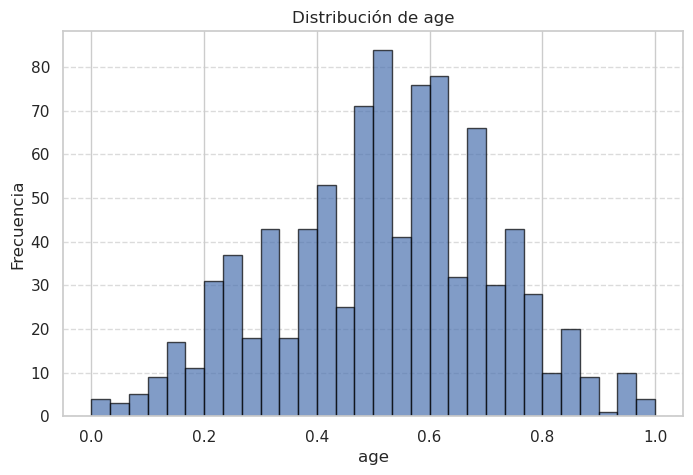

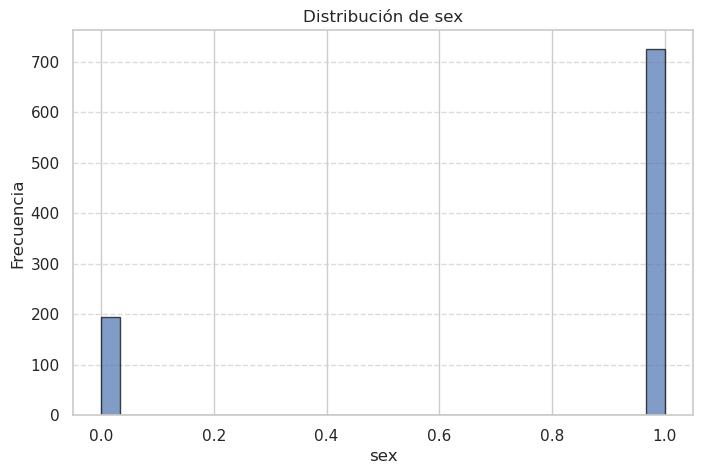

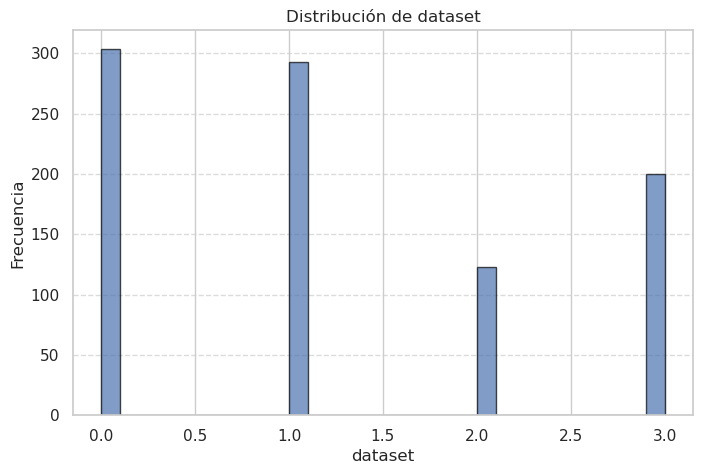

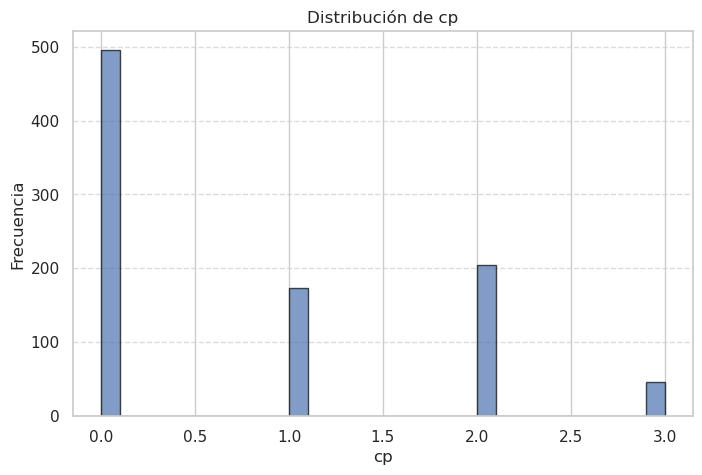

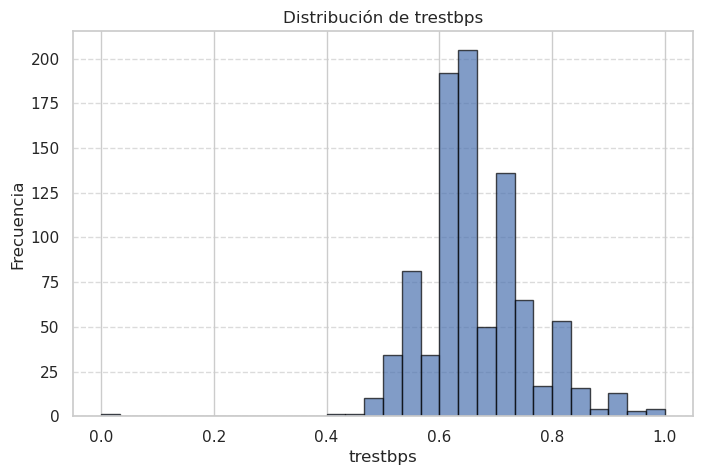

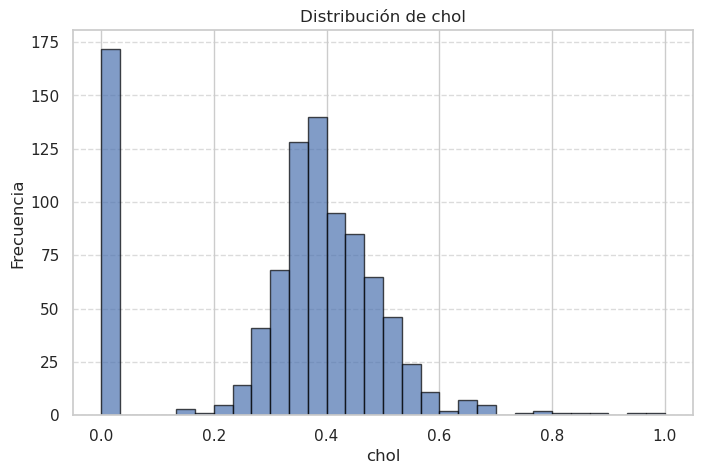

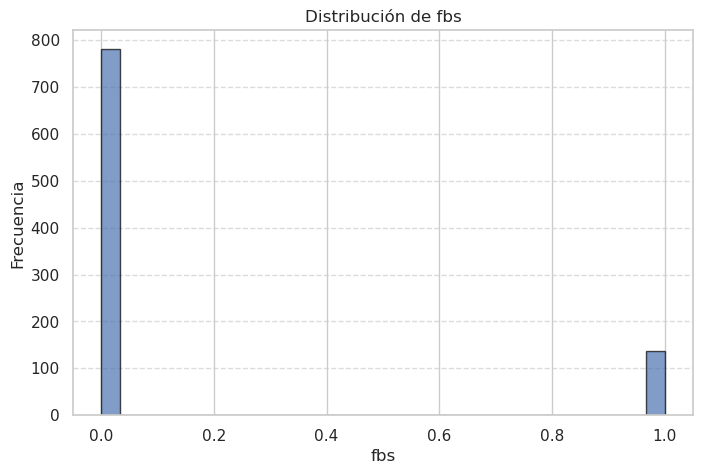

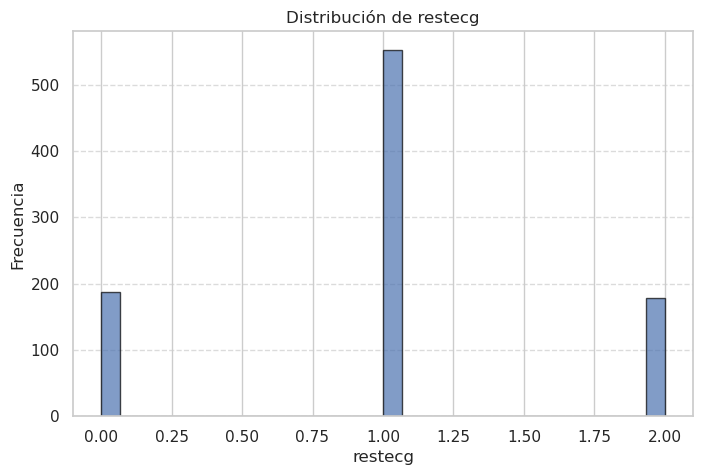

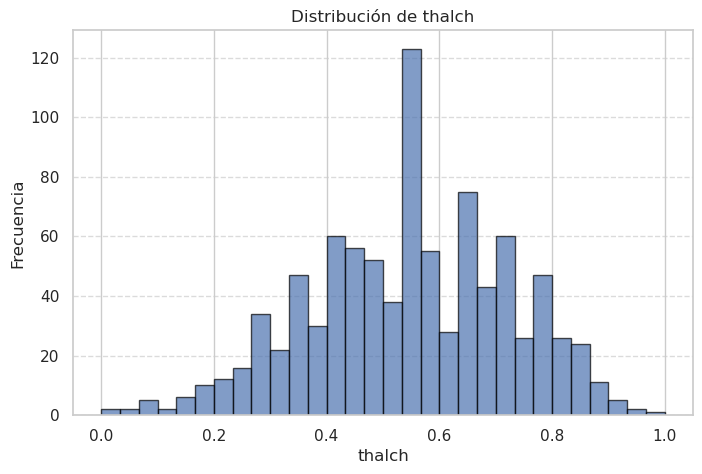

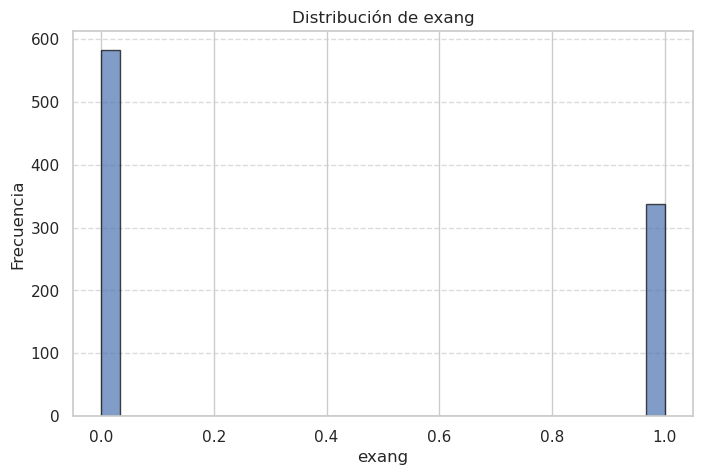

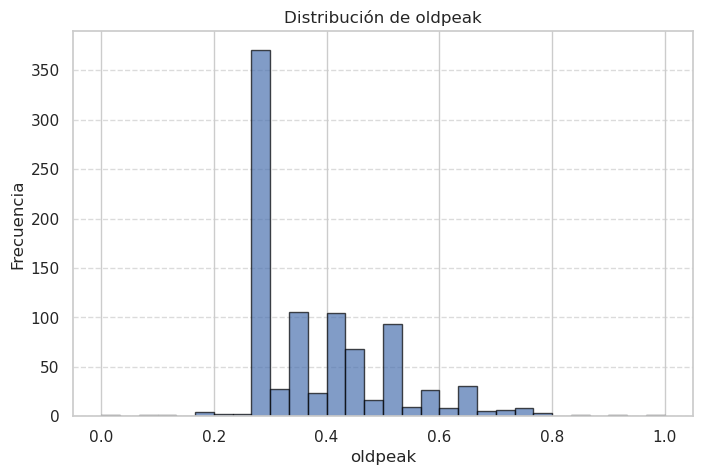

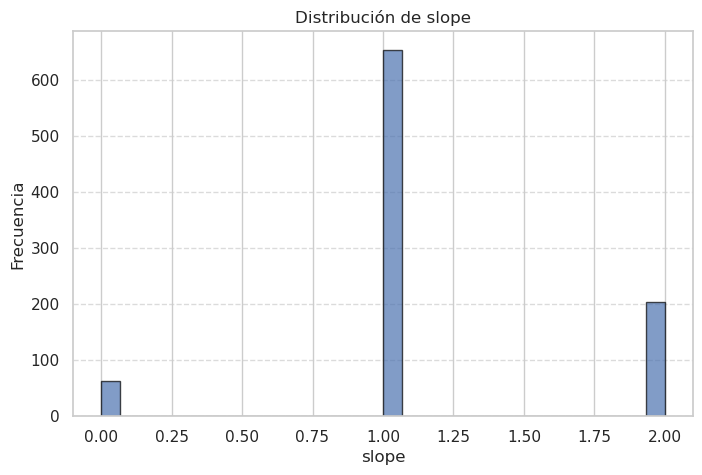

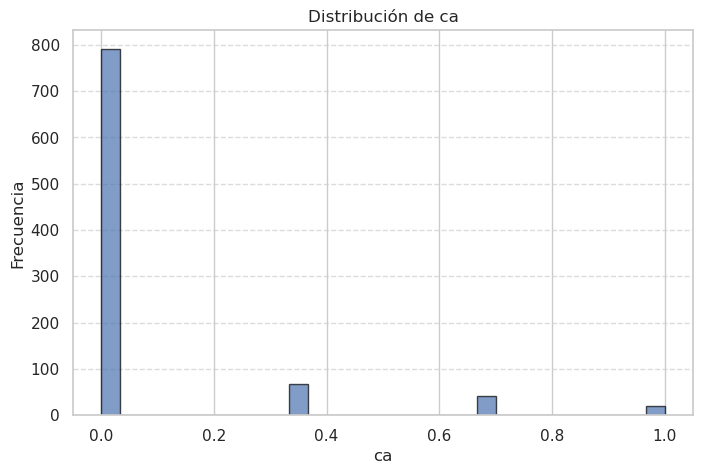

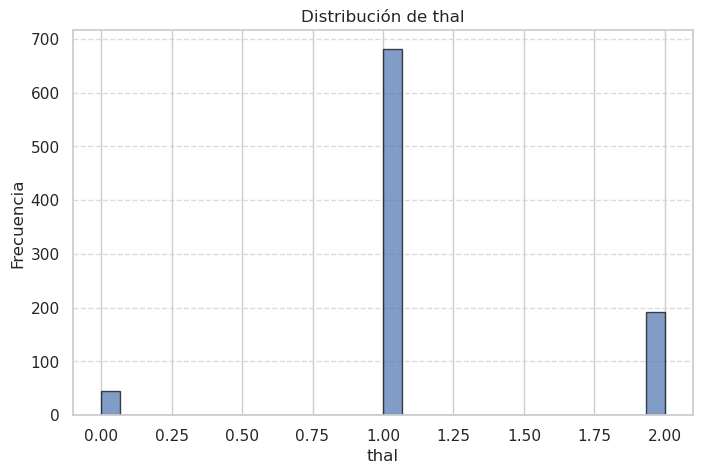

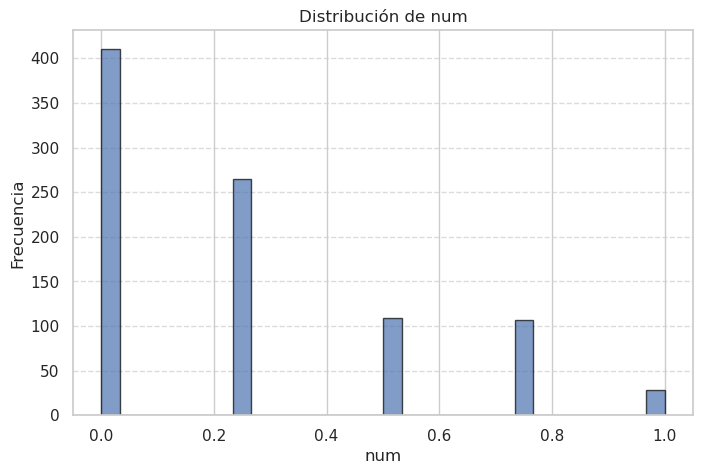

In [79]:
# Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Crear histogramas para cada variable numérica
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

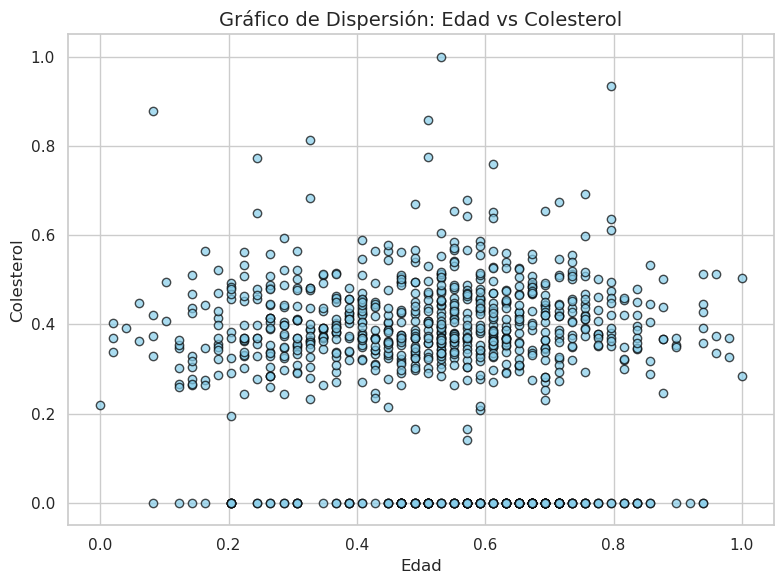

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas que se quieren comparar
x = df['age']  # Edad
y = df['chol']  # Colesterol

# Crear el gráfico de dispersión (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='skyblue', edgecolor='black', alpha=0.7)

# Etiquetas y título
plt.title('Gráfico de Dispersión: Edad vs Colesterol', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Colesterol', fontsize=12)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


### Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.

In [37]:
# Verificar valores nulos antes de la imputación
print("Valores nulos antes de imputación:")
print(df.isnull().sum())

# Imputación de valores nulos con el valor más frecuente (modo) por columna categórica
df[['fbs', 'restecg', 'exang', 'slope', 'thal']] = df[['fbs', 'restecg', 'exang', 'slope', 'thal']].transform(
    lambda col: col.fillna(col.mode()[0])
)

# Verificar valores nulos después de la imputación
print("\nValores nulos después de imputación:")
print(df.isnull().sum())

Valores nulos antes de imputación:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

Valores nulos después de imputación:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


**Normalización de las variables numéricas usando Min-Max Scaling o Standardization**

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'df' es el DataFrame que contiene los datos
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Normalización Min-Max
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verificar el resultado
print(df.head())


         id       age     sex    dataset               cp  trestbps      chol  \
0  0.000000  0.714286    male  cleveland   typical angina     0.725  0.386401   
1  0.001088  0.795918    male  cleveland     asymptomatic     0.800  0.474295   
2  0.002176  0.795918    male  cleveland     asymptomatic     0.600  0.379768   
3  0.003264  0.183673    male  cleveland      non-anginal     0.650  0.414594   
4  0.004353  0.265306  female  cleveland  atypical angina     0.650  0.338308   

     fbs         restecg    thalch  exang   oldpeak        slope        ca  \
0   True  lv hypertrophy  0.633803  False  0.556818  downsloping  0.000000   
1  False  lv hypertrophy  0.338028   True  0.465909         flat  1.000000   
2  False  lv hypertrophy  0.485915   True  0.590909         flat  0.666667   
3  False          normal  0.894366  False  0.693182  downsloping  0.000000   
4  False  lv hypertrophy  0.788732  False  0.454545    upsloping  0.000000   

                thal   num  
0       fixed d

**Label Encoding (Codificación de etiquetas)**

In [42]:
from sklearn.preprocessing import LabelEncoder

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el LabelEncoder a todas las columnas categóricas
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Verificar el resultado
print(df[categorical_columns].head())


   sex  dataset  cp  fbs  restecg  exang  slope  thal
0    1        0   3    1        0      0      0     0
1    1        0   0    0        0      1      1     1
2    1        0   0    0        0      1      1     2
3    1        0   2    0        1      0      0     1
4    0        0   1    0        0      0      2     1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        920 non-null    float64
 14  thal      920 non-null    int64  
 15  num       920 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 115.1 KB


**Exploración y preprocesamiento de datos:**
* Realiza una división del dataset en conjunto de entrenamiento y prueba. Asegúrate de que el dataset esté bien balanceado, verificando la distribución de la variable objetivo (enfermedad cardíaca sí/no).

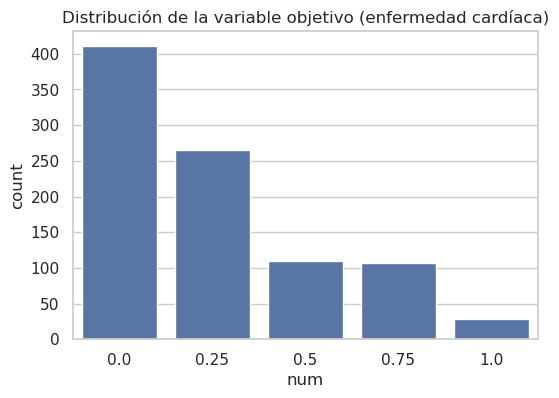

Distribución en el conjunto de entrenamiento:
num
0.00    0.447011
0.25    0.288043
0.50    0.118207
0.75    0.116848
1.00    0.029891
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
num
0.00    0.445652
0.25    0.288043
0.50    0.119565
0.75    0.114130
1.00    0.032609
Name: proportion, dtype: float64


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Verificar la distribución de la variable objetivo (enfermedad cardíaca)
# Suponiendo que la columna 'num' es la variable objetivo (si/no)
# Si la variable se llama de otra manera, reemplaza 'num' por el nombre correcto.
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df)  # Asegúrate de reemplazar 'num' por el nombre real de la variable objetivo
plt.title('Distribución de la variable objetivo (enfermedad cardíaca)')
plt.show()

# Dividir el dataset en conjunto de entrenamiento y prueba
X = df.drop('num', axis=1)  # Características (todas las columnas excepto la variable objetivo)
y = df['num']  # Variable objetivo (enfermedad cardíaca)

# Realizar la división con un 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verificar la distribución de la variable objetivo en los conjuntos de entrenamiento y prueba
print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))


### Primera opcion

**Crear el modelo de red neuronal (MLP)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.regularizers import l2

# Crear el modelo MLP
model = Sequential()

# Capa de entrada (y primera capa oculta)
model.add(Input(shape=(X_train.shape[1],)))  # Usar Input como la primera capa

# Capa oculta (primera capa densa)
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Capa oculta con dropout
model.add(Dropout(0.5))

# Capa oculta adicional
model.add(Dense(32, activation='relu'))

# Capa de salida (probabilidad de enfermedad cardíaca)
model.add(Dense(1, activation='sigmoid'))  # 'sigmoid' porque es un problema binario

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implementar early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Resumen del modelo
model.summary()





Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

**Entrenar y evaluar el modelo**

In [66]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")


Epoch 1/100


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1767 - loss: 1.0387 - val_accuracy: 0.4293 - val_loss: 0.7824
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4376 - loss: 0.7793 - val_accuracy: 0.4402 - val_loss: 0.7050
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4439 - loss: 0.7164 - val_accuracy: 0.4457 - val_loss: 0.6654
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4214 - loss: 0.6947 - val_accuracy: 0.4565 - val_loss: 0.6401
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4475 - loss: 0.6545 - val_accuracy: 0.4565 - val_loss: 0.6182
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4502 - loss: 0.6268 - val_accuracy: 0.4565 - val_loss: 0.6012
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4619 - loss: 0.6056 - val_accuracy: 0.4565 - val_loss: 0.5841
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4513 - loss: 0.5824 - val_accuracy: 0.4565 - val_loss: 0.

**Evaluar el rendimiento**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


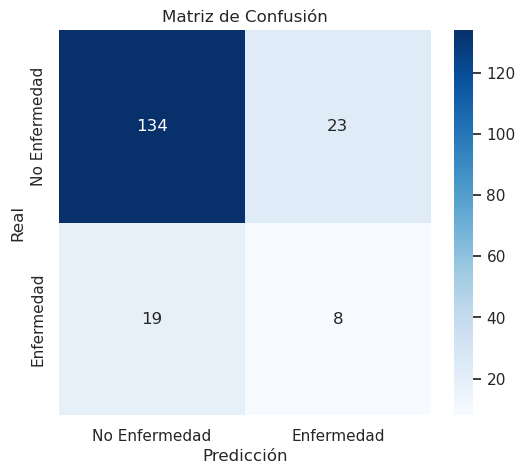


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       157
           1       0.26      0.30      0.28        27

    accuracy                           0.77       184
   macro avg       0.57      0.57      0.57       184
weighted avg       0.79      0.77      0.78       184



In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Verificar y asegurarse de que y_test es binario
y_test = (y_test > 0.5).astype("int32")

# Hacer predicciones y convertirlas a binario
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Enfermedad", "Enfermedad"], yticklabels=["No Enfermedad", "Enfermedad"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

#Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


**Resumen:**
* El modelo está funcionando bastante bien para predecir la **clase 0 (No Enfermedad)**, con una alta precisión y recall. Sin embargo, tiene serias dificultades con la **clase 1 (Enfermedad)**, ya que su capacidad para identificar correctamente los casos positivos es baja (bajo recall y precisión). La precisión global es razonablemente buena, pero el desbalance de clases está afectando negativamente el desempeño en la clase minoritaria.

* Es importante considerar técnicas para manejar el desbalance de clases, como el muestreo balanceado o el ajuste de pesos en las clases, para mejorar el rendimiento en la clase 1.

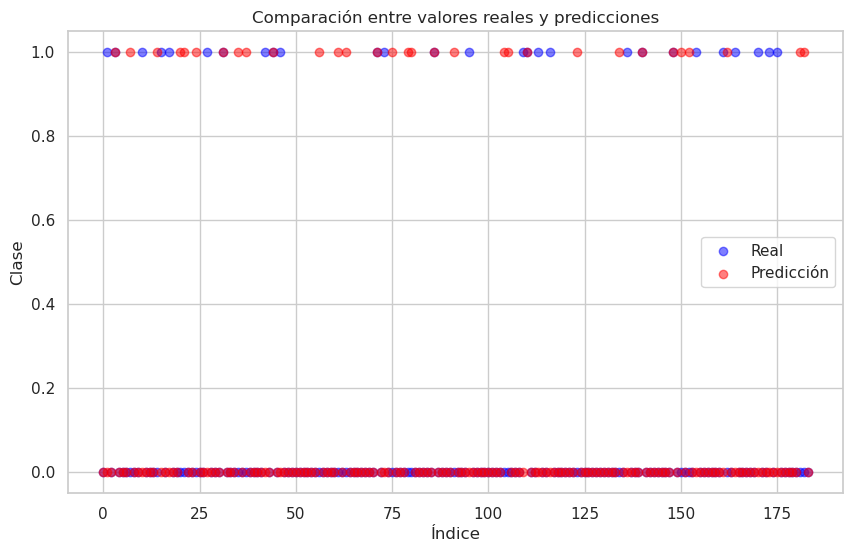

In [68]:
import matplotlib.pyplot as plt

# Graficar los valores de y_test y y_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicción', alpha=0.5)

plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Índice")
plt.ylabel("Clase")
plt.legend()
plt.show()


### Segunda opcion

**Entrenamiento del modelo:**
* Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.
* Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Asumiendo que tienes X y y como tus datos de entrada y etiquetas
# X son las características (features) y y son las etiquetas (target)

# Dividir los datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo MLP
model = Sequential()

# Capa de entrada (puedes ajustar el número de unidades según el tamaño de tus datos)
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.25))  # Capa de dropout con tasa de 25%

# Capa oculta 1
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))  # Capa de dropout con tasa de 25%

# Capa oculta 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))  # Capa de dropout con tasa de 25%

# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Configuración del EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],  # Usamos early stopping
    verbose=1
)

# Evaluación del modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Loss en validación: {val_loss:.4f}")
print(f"Precisión en validación: {val_accuracy:.4f}")


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4493 - loss: 0.4632 - val_accuracy: 0.4130 - val_loss: 0.4726
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4521 - loss: 0.4623 - val_accuracy: 0.4130 - val_loss: 0.4746
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4667 - loss: 0.4543 - val_accuracy: 0.4076 - val_loss: 0.4728
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4526 - loss: 0.4638 - val_accuracy: 0.4130 - val_loss: 0.4754
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4637 - loss: 0.4467 - val_accuracy: 0.4076 - val_loss: 0.4724
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4722 - loss: 0.4436 - val_accuracy: 0.4130 - val_loss: 0.4775
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4815 - loss: 0.4350 - val_accuracy: 0.4076 - val_loss: 0.4754
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4584 - loss: 0.4408 - val_accuracy: 0.4076 -

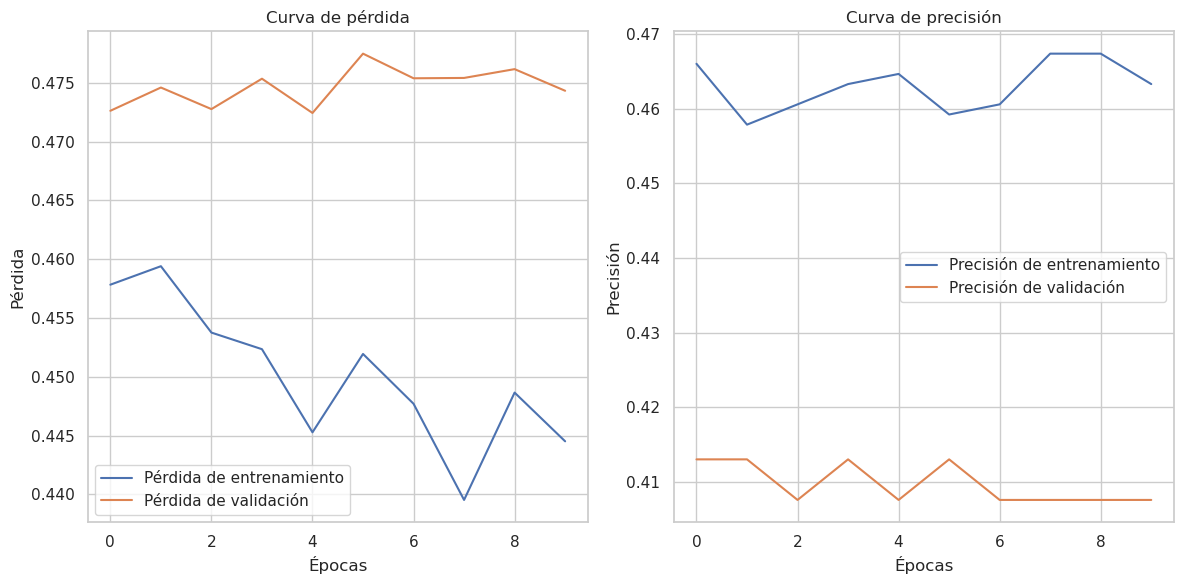

In [71]:
import matplotlib.pyplot as plt

# Entrenar el modelo
history = model.fit(
    X_train, y_train,  # Entrenamiento con los datos de entrenamiento
    epochs=100,        # Máximo de 100 épocas
    batch_size=32,     # Tamaño de lote
    validation_data=(X_val, y_val),  # Datos de validación
    callbacks=[early_stopping],  # Early stopping activado
    verbose=1  # Muestra el progreso del entrenamiento
)

# Visualizar las curvas de aprendizaje (pérdida y precisión)
plt.figure(figsize=(12, 6))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


**Evaluación del modelo:**
* Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión.
* Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7496 - loss: 0.4638  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       157
           1       0.29      0.48      0.36        27

    accuracy                           0.75       184
   macro avg       0.59      0.64      0.60       184
weighted avg       0.81      0.75      0.77       184



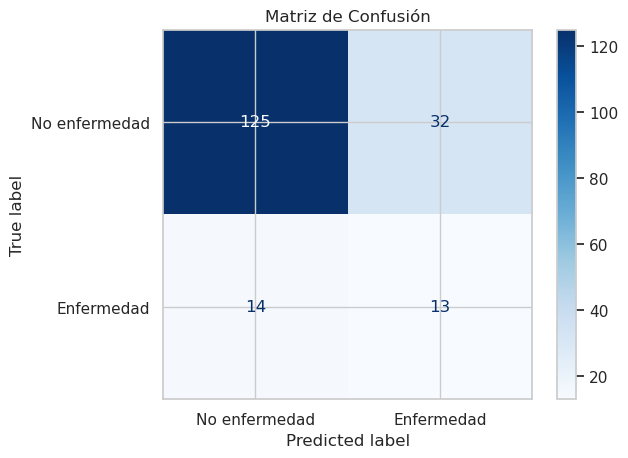

Precisión en conjunto de prueba: 0.7500


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predecir las etiquetas para los datos de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Umbral de 0.5 para predicción binaria

# Calcular el reporte de clasificación (precisión, recall, F1-score)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No enfermedad', 'Enfermedad'])
cm_display.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

# Mostrar precisión en conjunto de prueba
print(f"Precisión en conjunto de prueba: {test_accuracy:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


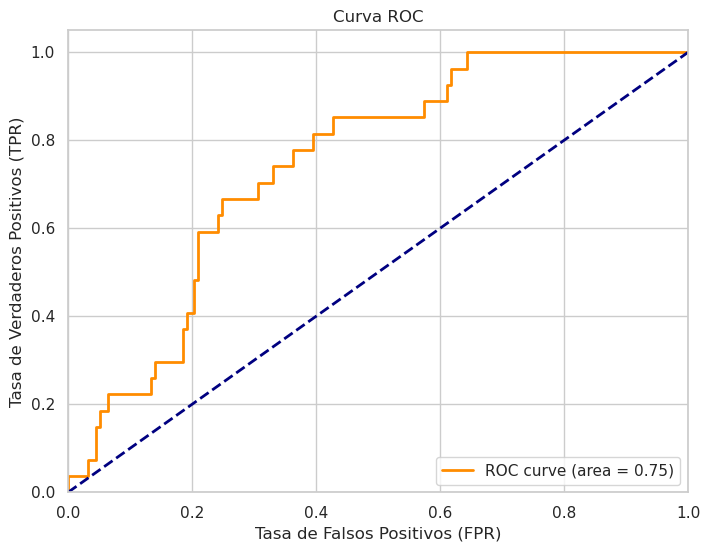

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predicciones del modelo en el conjunto de prueba
y_pred_prob = model.predict(X_test)  # Predicciones de probabilidades

# Calcular los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # fpr = False Positive Rate, tpr = True Positive Rate

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (modelo aleatorio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**Matriz de confusion**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


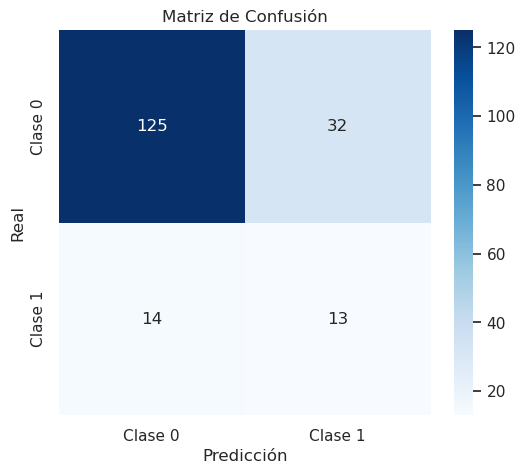

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convierte las probabilidades en etiquetas

cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


**Interpretación:**

* True Positive (TP): Casos positivos correctamente clasificados.
* False Positive (FP): Casos negativos incorrectamente clasificados como positivos.
* True Negative (TN): Casos negativos correctamente clasificados.
* False Negative (FN): Casos positivos incorrectamente clasificados como negativos.

**Curva de Precisión-Recuperación (Precision-Recall Curve)**

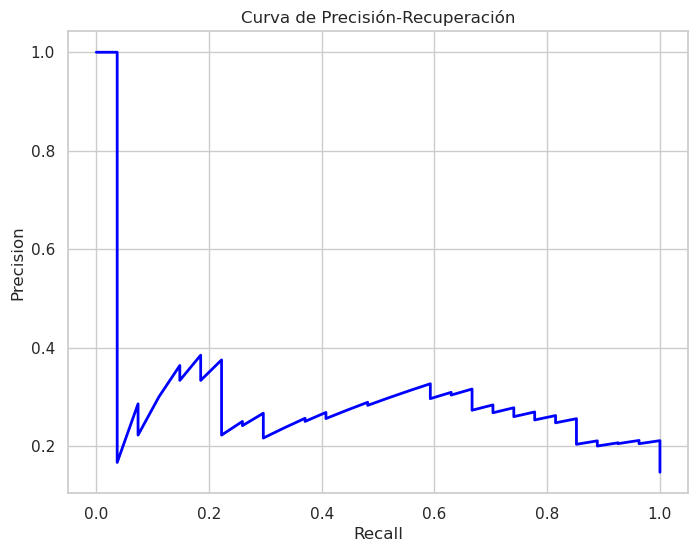

In [75]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recuperación')
plt.grid(True)
plt.show()


**Interpretación:**

* La precisión muestra la proporción de predicciones positivas que son correctas.
* El recall muestra la proporción de verdaderos positivos que el modelo ha capturado.
* Es útil especialmente en clasificación binaria con clases desbalanceadas.

**Histograma de las Predicciones (Probabilidades)**

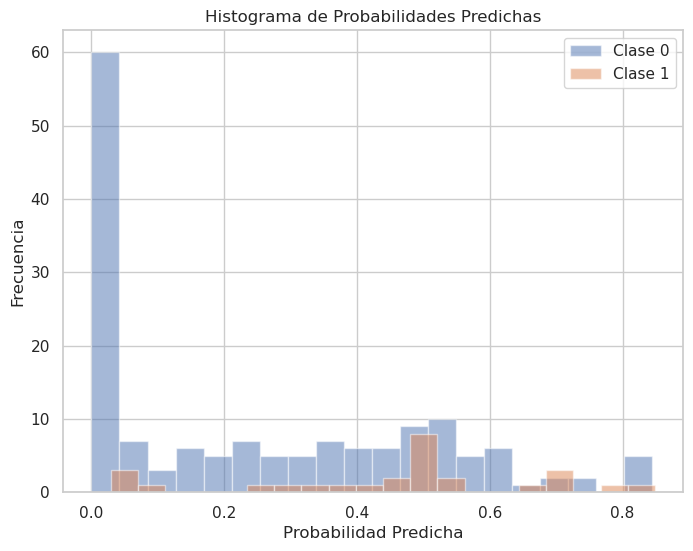

In [76]:
# Histograma de las probabilidades predichas
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.5, label='Clase 0')
plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.5, label='Clase 1')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades Predichas')
plt.legend()
plt.show()


**Interpretación:**

* Un histograma te muestra la distribución de las probabilidades predichas para cada clase. Puedes observar si las clases están bien separadas o si hay superposición.

**Curva de Aprendizaje**

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4913 - loss: 0.4254 - val_accuracy: 0.4076 - val_loss: 0.4720
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4517 - loss: 0.4479 - val_accuracy: 0.4076 - val_loss: 0.4778
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4558 - loss: 0.4418 - val_accuracy: 0.4076 - val_loss: 0.4754
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4469 - loss: 0.4545 - val_accuracy: 0.4076 - val_loss: 0.4767
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4487 - loss: 0.4603 - val_accuracy: 0.4076 - val_loss: 0.4762
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4565 - loss: 0.4498 - val_accuracy: 0.4130 - val_loss: 0.4722


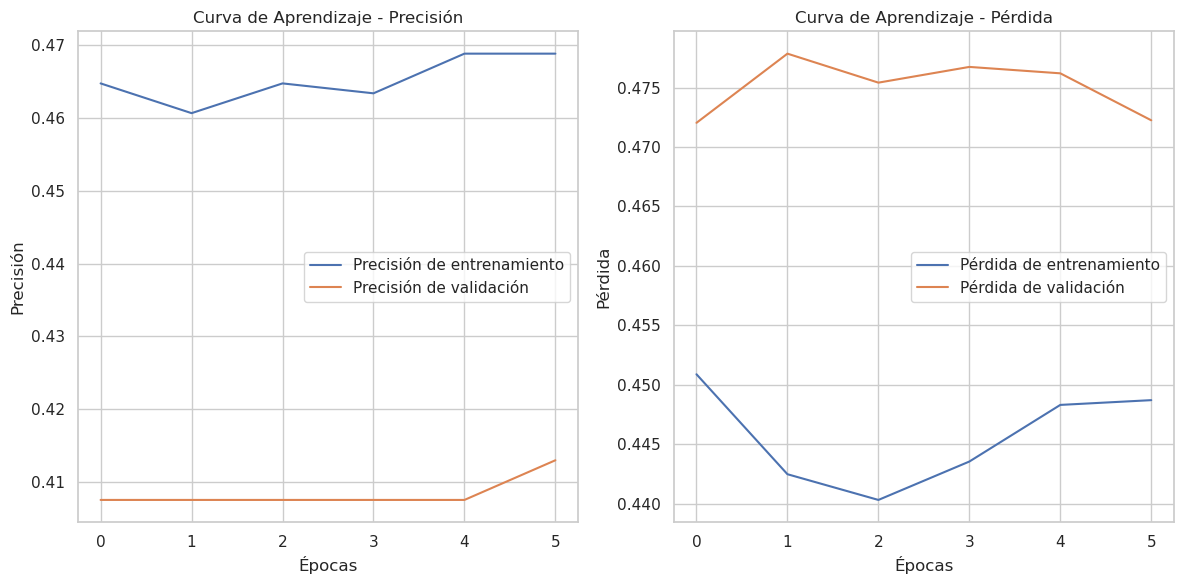

In [77]:
import matplotlib.pyplot as plt

# Suponiendo que guardaste el historial de entrenamiento en una variable llamada 'history'
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Graficar precisión y pérdida
plt.figure(figsize=(12, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Aprendizaje - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Aprendizaje - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


**Interpretación:**

* La precisión muestra si el modelo está mejorando en ambas fases de entrenamiento y validación.
* La pérdida indica si el modelo está aprendiendo de manera efectiva o si está sobreajustándose.

# Evaluación del Modelo: Resultados de Clasificación

El modelo entrenado presenta métricas variadas para las dos clases en el conjunto de prueba. Aquí te dejo un resumen claro y accesible sobre su desempeño:

## Métricas Clave

### **Precisión** (Precision)
- **Clase 0 (No enfermedad)**: 0.90 (El 90% de las predicciones de "no enfermedad" son correctas).
- **Clase 1 (Enfermedad)**: 0.29 (Solo el 29% de las predicciones de "enfermedad" son correctas).

### **Recall** (Sensibilidad o Tasa de Verdaderos Positivos)
- **Clase 0 (No enfermedad)**: 0.80 (El modelo acierta el 80% de los casos de "no enfermedad").
- **Clase 1 (Enfermedad)**: 0.48 (El modelo solo detecta el 48% de los casos de "enfermedad").

### **F1-Score**
- **Clase 0 (No enfermedad)**: 0.84 (El balance entre precisión y recall es bastante bueno para esta clase).
- **Clase 1 (Enfermedad)**: 0.36 (El desempeño para "enfermedad" es deficiente, lo que refleja una falta de detección).

### **Precisión Global** (Accuracy)
- El **accuracy** del modelo es 0.75, lo que significa que el 75% de las predicciones realizadas por el modelo son correctas en general.

## Promedios

### **Macro Promedio** (Promedio sin ponderar)
- **Precisión**: 0.59
- **Recall**: 0.64
- **F1-Score**: 0.60

Este promedio refleja cómo el modelo se comporta de manera equitativa entre las clases, sin tener en cuenta cuántos ejemplos hay de cada clase. En este caso, el modelo no tiene un desempeño sobresaliente para ninguna de las dos clases, pero se ve un mejor rendimiento para la clase mayoritaria ("no enfermedad").

### **Promedio Ponderado**
- **Precisión**: 0.81
- **Recall**: 0.75
- **F1-Score**: 0.77

El promedio ponderado toma en cuenta la cantidad de ejemplos en cada clase. El modelo tiene un buen desempeño en la clase mayoritaria, lo que eleva el rendimiento general.

## Reflexión Final

### **Desempeño de la Clase 0 (No enfermedad)**
El modelo tiene un desempeño fuerte en la clase "0" (no enfermedad), con una alta precisión (0.90) y un buen recall (0.80). Esto indica que el modelo identifica correctamente a la mayoría de los pacientes sin enfermedad cardíaca.

### **Desempeño de la Clase 1 (Enfermedad)**
El desempeño en la clase "1" (enfermedad) no es tan bueno, con una precisión baja de 0.29 y un recall de 0.48. Esto sugiere que el modelo tiene dificultades para identificar correctamente a los pacientes con enfermedad cardíaca, lo cual es preocupante si el objetivo es predecir esta condición con precisión.

### **Posibles Mejoras**
- **Desbalance de clases**: Como la clase "0" tiene más ejemplos que la clase "1", el modelo tiene una mayor tendencia a predecir "no enfermedad". Esto puede ser solucionado utilizando técnicas de balanceo de clases, como el sobre-muestreo de la clase minoritaria (SMOTE) o el submuestreo de la clase mayoritaria.
- **Ajuste de umbral**: Se puede considerar ajustar el umbral de decisión para hacer el modelo más sensible a la clase "1" (enfermedad).
- **Modelos más avanzados**: También se puede explorar el uso de modelos más complejos o técnicas de regularización, como Random Forests o XGBoost, que suelen manejar mejor los desequilibrios de clase.

En resumen, el modelo tiene un desempeño decente en general, pero presenta desafíos para identificar correctamente a los pacientes con enfermedad cardíaca, lo que podría mejorar con ajustes adicionales.


.